# Interpolation

In [1]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Newton interpolation

$f(x)=a_0+a_1(x-x_0)+a_2(x-x_0)(x-x_1)+...+a_n(x-x-0)...(x-x_n)$

Divided differences:

$f(x_1,x_0)=\frac{y_1-y_0}{x_1-x_0}$


### Example:

Find the polynomial function that goes through all the following data points:

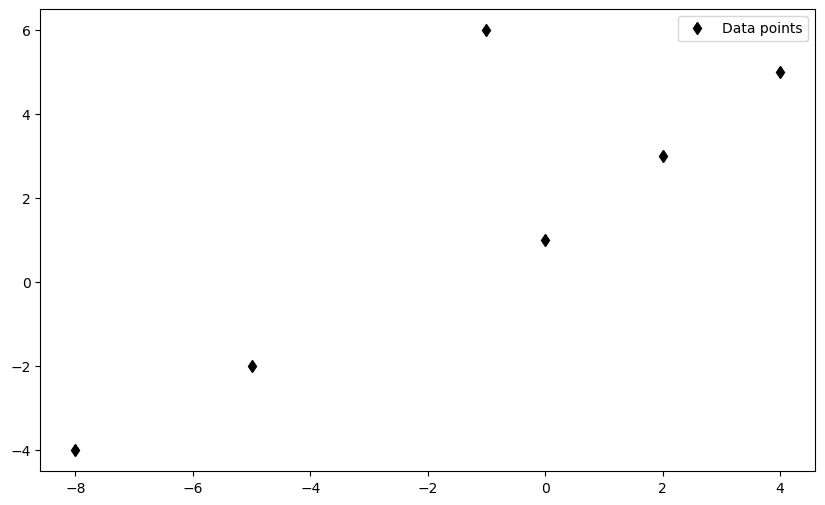

In [2]:
x = np.array([-8,-5, -1, 0, 2, 4])
y = np.array([-4,-2, 6, 1, 3, 5])

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y, marker='d', color ="black", linestyle=" ", label='Data points')
ax.legend()
plt.show()

In [3]:
# I copied this code from:
# https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html

def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x - x_data[n-k])*p
    return p

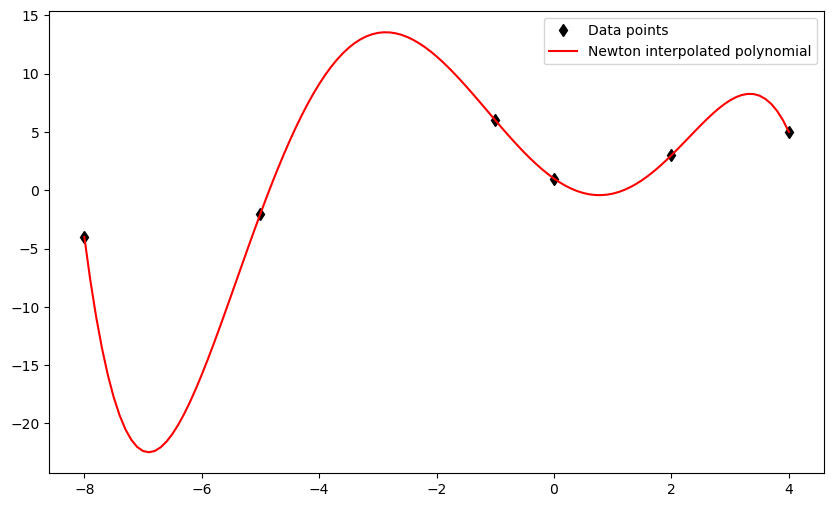

In [4]:
# get the divided difference coefficients
a_s = divided_diff(x, y)[0,:]

# evaluate on new data points
x_new = np.arange(-8, 4.1, 0.1)
y_new = newton_poly(a_s, x, x_new)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y, marker='d', color ="black", linestyle=" ", label='Data points') # Original data
ax.plot(x_new, y_new, color ="red", linestyle="-", label='Newton interpolated polynomial') # Newton interpolator
ax.legend()
plt.show()